# Explore here

CLIENT_ID: e18698933cb347c9a343c8d25ec9616f
CLIENT_SECRET: 995e3dc1447f4236869c280c18049390
ID de Jhené Aiko encontrado: 5ZS223C6JyBfXasXxrRqOk


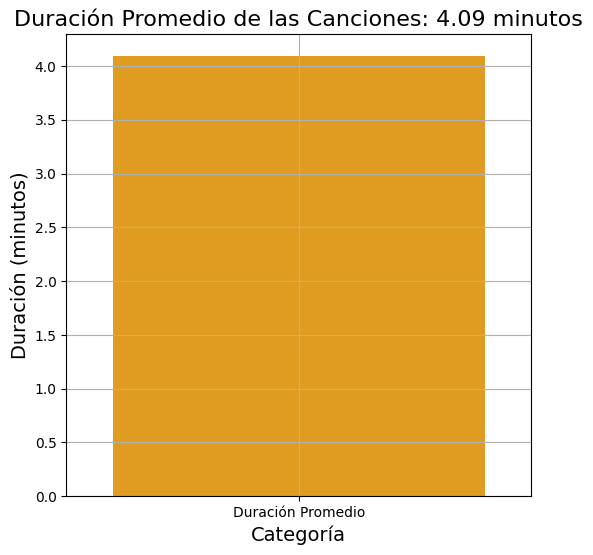

Top 10 canciones más populares de Jhené Aiko (ordenadas por popularidad descendente):
   duration_ms                              name  popularity
0     4.616000                            Sativa          80
1     6.379333          Stay Ready (What A Life)          79
2     3.581550                          stranger          76
4     4.267983                         Bed Peace          74
5     4.241550                         The Worst          74
6     3.936000                 While We're Young          73
7     4.029550                           my mine          71
8     3.547767               B.S. (feat. H.E.R.)          70
3     2.703117  Can't Hide It (feat. Jhené Aiko)          69
9     3.617100                        Blue Dream          69


In [12]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials



# load the .env file variables
load_dotenv()

CLIENT_ID = os.getenv("CLIENT_ID")
CLIENT_SECRET = os.getenv("CLIENT_SECRET")
print(f"CLIENT_ID: {CLIENT_ID}")
print(f"CLIENT_SECRET: {CLIENT_SECRET}")

client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


search_result = sp.search("Jhené Aiko", type="artist", limit=1)

if search_result['artists']['items']:
    artist_id = search_result['artists']['items'][0]['id']
    print(f"ID de Jhené Aiko encontrado: {artist_id}")
    
    try:
        response = sp.artist_top_tracks(artist_id, country="US")
        
        if response:
            tracks = response["tracks"]
            tracks = [
                {k: (v / (1000 * 60)) if k == "duration_ms" else v for k, v in track.items() if k in ["name", "popularity", "duration_ms"]}
                for track in tracks
            ]
            
            track_data = tracks
            df_tracks = pd.DataFrame(track_data)
            
            
            average_duration = df_tracks['duration_ms'].mean() 
            plt.figure(figsize=(6, 6))
            sns.barplot(x=["Duración Promedio"], y=[average_duration], color='orange')
            plt.title(f'Duración Promedio de las Canciones: {average_duration:.2f} minutos', fontsize=16)
            plt.ylabel('Duración (minutos)', fontsize=14)
            plt.xlabel('Categoría', fontsize=14)
            plt.grid(True)
            plt.show()

            df_tracks_sorted = df_tracks.sort_values(by='popularity', ascending=False)
            
            print("Top 10 canciones más populares de Jhené Aiko (ordenadas por popularidad descendente):")
            print(df_tracks_sorted.head(10))
        else:
            print("No se obtuvieron datos de las canciones.")
    except Exception as e:
        print(f"Error al obtener las canciones: {e}")
else:
    print("No se encontró a Jhené Aiko.")

In [13]:
artist_id = "5ZS223C6JyBfXasXxrRqOk"
artist_info = sp.artist(artist_id)
print(f"Name: {artist_info['name']}")
print(f"Followers: {artist_info['followers']['total']}")
print(f"Popularity: {artist_info['popularity']}")


Name: Jhené Aiko
Followers: 9124487
Popularity: 81


In [14]:
tracks = sp.artist_top_tracks(artist_id)['tracks']


songs = []
for track in tracks:
    songs.append({
        "name": track['name'],
        "duration_ms": track['duration_ms'],
        "popularity": track['popularity']
    })

df = pd.DataFrame(songs)
df['duration_min'] = df['duration_ms'] / 60000

In [15]:
correlation = df[['duration_min', 'popularity']].corr()
print(correlation)

              duration_min  popularity
duration_min      1.000000    0.749151
popularity        0.749151    1.000000


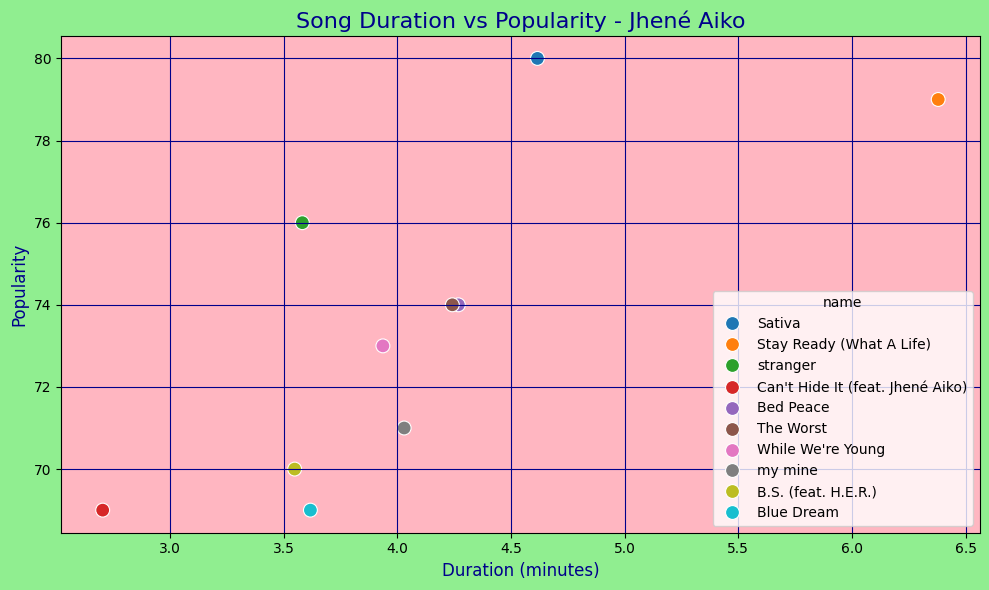

In [16]:
plt.figure(figsize=(10, 6))


sns.scatterplot(data=df, x='duration_min', y='popularity', hue='name', s=100)

plt.title("Song Duration vs Popularity - Jhené Aiko", fontsize=16, color='darkblue')
plt.xlabel("Duration (minutes)", fontsize=12, color='darkblue')
plt.ylabel("Popularity", fontsize=12, color='darkblue')

#BACKGROUND COLOURS
plt.gcf().patch.set_facecolor('lightgreen')
plt.gca().set_facecolor('lightpink')

plt.grid(True, color='darkblue')

plt.tight_layout()
plt.show()

The data suggest it could be a clear relation between the duration and the popularity in this case.

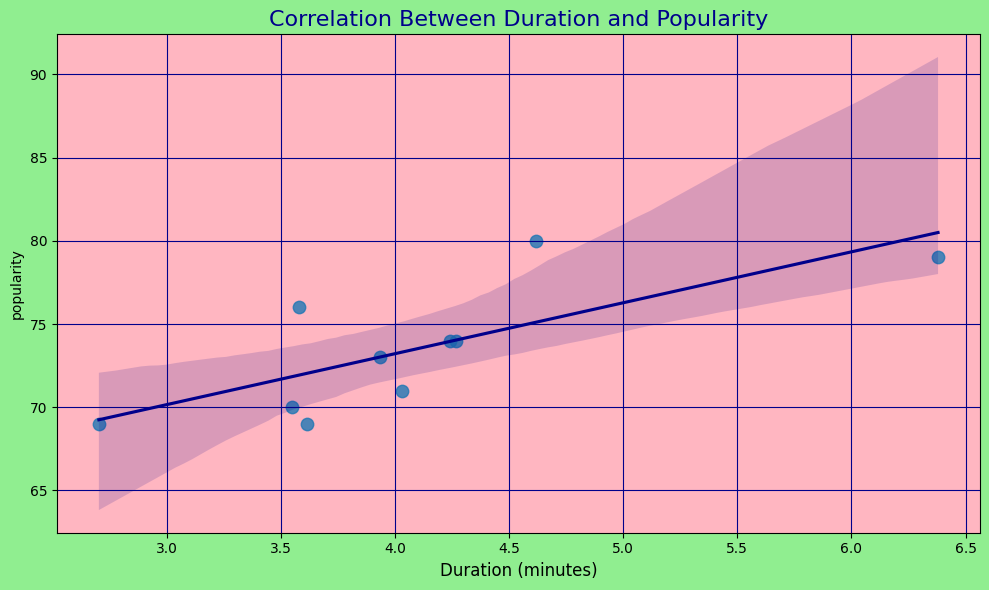

In [17]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='duration_min', y='popularity', scatter_kws={'s': 80}, line_kws={"color": "darkblue"})
plt.title("Correlation Between Duration and Popularity", fontsize=16, color='darkblue')
plt.xlabel("Duration (minutes)", fontsize=12)
plt.gcf().patch.set_facecolor('lightgreen')
plt.gca().set_facecolor('lightpink')
plt.grid(True, color='darkblue')
plt.tight_layout()
plt.show()